In [356]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set() 

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

In [389]:
#Import Data
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

X_train = train.drop(columns=['Response'])
y_train = train['Response']


X_test = test.drop(columns=['Response'])
y_test = test['Response']


print("Data dims for train: ", X_train.shape, y_train.shape)
print("Data dims for test: ", X_test.shape, y_test.shape)

Data dims for train:  (1813, 27) (1813,)
Data dims for test:  (444, 27) (444,)


Based on our previous EDA, there is no strong separation of response in the categorical variables that suggest useful features. 

## Decision Tree

In [290]:
# Decision Tree using Train Data
dectree = DecisionTreeClassifier()               # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 1.0

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.7567567567567568



<AxesSubplot:>

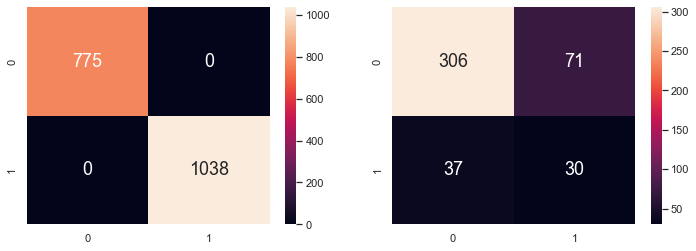

In [291]:
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

[Text(637.0965, 1266.2682352941179, 'ChildrenHome <= 0.5\ngini = 0.489\nsamples = 1813\nvalue = [775, 1038]\nclass = 1'),
 Text(385.02, 1189.524705882353, 'MntWines <= 648.0\ngini = 0.293\nsamples = 819\nvalue = [146, 673]\nclass = 1'),
 Text(281.976, 1112.7811764705884, 'Marital_Status_Married <= 0.5\ngini = 0.447\nsamples = 403\nvalue = [136, 267]\nclass = 1'),
 Text(171.12, 1036.0376470588235, 'Marital_Status_Together <= 0.5\ngini = 0.363\nsamples = 323\nvalue = [77, 246]\nclass = 1'),
 Text(92.256, 959.2941176470589, 'NumWebPurchases <= 2.5\ngini = 0.258\nsamples = 282\nvalue = [43, 239]\nclass = 1'),
 Text(47.616, 882.5505882352942, 'NumStorePurchases <= 2.5\ngini = 0.473\nsamples = 26\nvalue = [16, 10]\nclass = 0'),
 Text(35.712, 805.8070588235295, 'NumWebPurchases <= 1.5\ngini = 0.408\nsamples = 14\nvalue = [4, 10]\nclass = 1'),
 Text(23.808, 729.0635294117648, 'MntFruits <= 15.0\ngini = 0.32\nsamples = 5\nvalue = [4, 1]\nclass = 0'),
 Text(11.904, 652.32, 'gini = 0.0\nsamples =

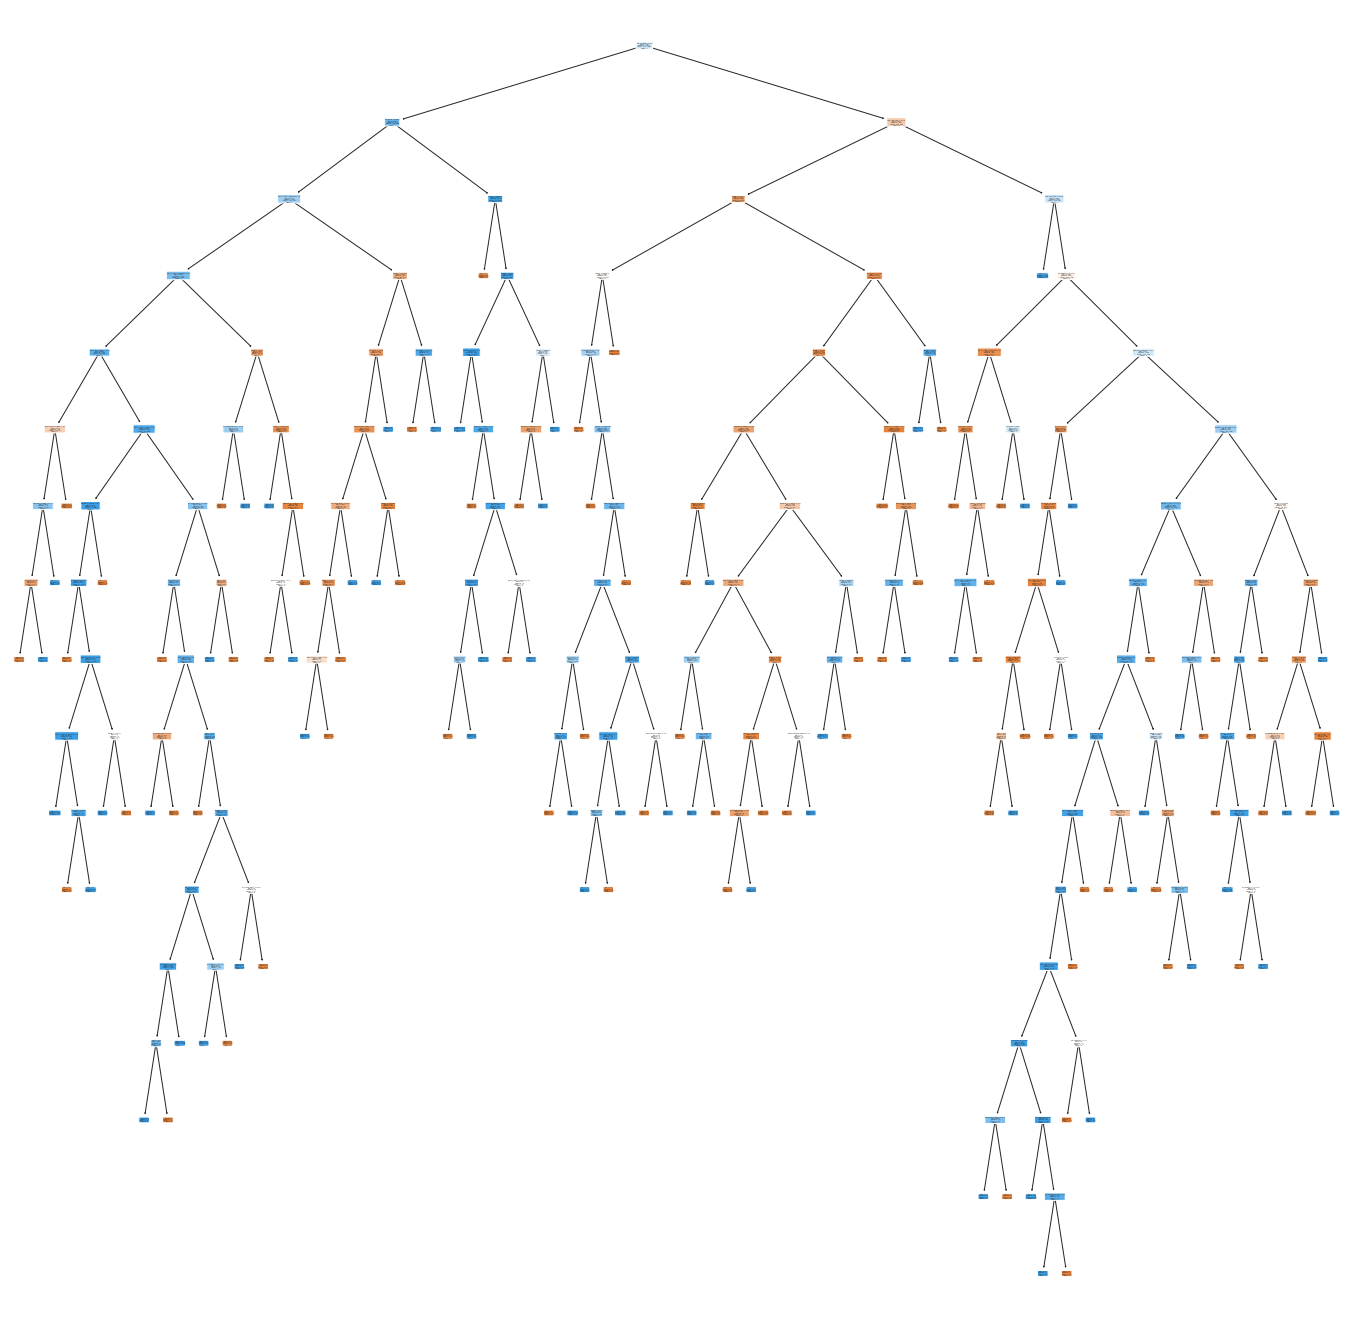

In [292]:
# Plot the trained Decision Tree
from sklearn.tree import plot_tree

f = plt.figure(figsize=(24,24))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["0","1"])

When the max depth of the decision tree is not set, and allowed to spawn, we firstly observe that the decision tree has a large depth, of 17. We also note that the first split is based on the factor `ChildrenHome` and the second ones are based on `MntWines` and `Marital_Status_Married`.

Secondly, we observe from the goodness of fit that the classification accuracy of the train dataset is 1, but that of the test dataset is 0.74, hence, we can conclude that it has been overfitted. 

With this in mind, a max depth that tries to satiesfy both reasonably will be sought out. The  downside to this method is that this would work for this particular train-test split, and different results will likely be observed from different train-test split.

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.7628240485383343

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.5427927927927928



[Text(334.8, 543.6, 'ChildrenHome <= 0.5\ngini = 0.489\nsamples = 1813\nvalue = [775, 1038]\nclass = 1'),
 Text(167.4, 326.16, 'MntWines <= 648.0\ngini = 0.293\nsamples = 819\nvalue = [146, 673]\nclass = 1'),
 Text(83.7, 108.72000000000003, 'gini = 0.447\nsamples = 403\nvalue = [136, 267]\nclass = 1'),
 Text(251.10000000000002, 108.72000000000003, 'gini = 0.047\nsamples = 416\nvalue = [10, 406]\nclass = 1'),
 Text(502.20000000000005, 326.16, 'Year_Customer <= 8.003\ngini = 0.465\nsamples = 994\nvalue = [629, 365]\nclass = 0'),
 Text(418.5, 108.72000000000003, 'gini = 0.268\nsamples = 507\nvalue = [426, 81]\nclass = 0'),
 Text(585.9, 108.72000000000003, 'gini = 0.486\nsamples = 487\nvalue = [203, 284]\nclass = 1')]

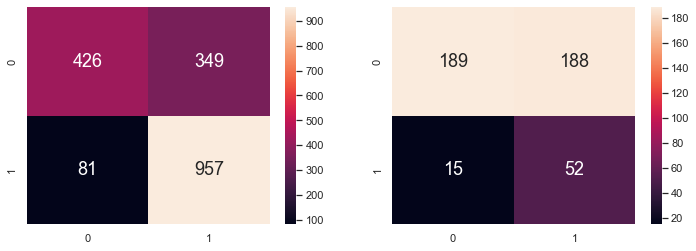

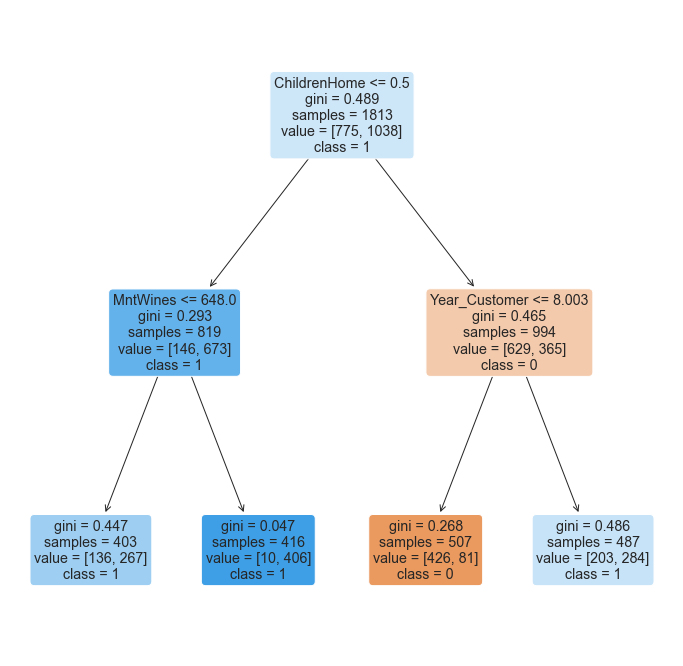

In [293]:
# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth=2)    # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# Plot the trained Decision Tree
f = plt.figure(figsize=(12,12))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["0","1"])

With max_depth=2, we note that the classification accuracy has lowered, and a decision tree with a higher depth is likely needed. We also note that `ChildrenHome` and `MntWines` are factors that have reappeared. `Year_Customer` also seems to be an important factor.

### Hyperparameter Tuning

In order to properly obtain the best model, we use hyperparameter optimisation. We use Grid Search to do so. 

In [309]:
from sklearn.model_selection import GridSearchCV

# We will be tuning based on the following parameters
criterion = ['gini', 'entropy']
# Number of features to consider at every split
max_features = [int(x) for x in np.arange(start = 1, stop = 28, step = 1)]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.arange(start = 2, stop = 25, step = 4)]

param_grid = {
    'criterion': criterion,
    'max_features': max_features,
    'max_depth': max_depth,
}


newdectree = DecisionTreeClassifier()
grid_search = GridSearchCV(
    estimator = newdectree,
    param_grid = param_grid,
    cv = 10,
    n_jobs = -1,
    scoring = 'f1',
    return_train_score = True
)

g_search = grid_search.fit(X_train, y_train)

In [310]:
result = pd.DataFrame(g_search.cv_results_)
result.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,params,split0_test_score,split1_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.009456,0.001383,0.004947,0.000611,gini,2,1,"{'criterion': 'gini', 'max_depth': 2, 'max_fea...",0.698795,0.712871,...,0.670747,0.722820,0.752809,0.786599,0.719955,0.785789,0.620128,0.766624,0.720106,0.053576
1,0.009932,0.005075,0.012700,0.018785,gini,2,2,"{'criterion': 'gini', 'max_depth': 2, 'max_fea...",0.773109,0.744939,...,0.694954,0.780412,0.733198,0.692170,0.611664,0.713214,0.761038,0.751515,0.732036,0.053429
2,0.007920,0.002053,0.005090,0.001838,gini,2,3,"{'criterion': 'gini', 'max_depth': 2, 'max_fea...",0.673077,0.766667,...,0.603242,0.781359,0.779754,0.780510,0.778214,0.660105,0.793635,0.751982,0.740140,0.064209
3,0.008114,0.000883,0.011163,0.006744,gini,2,4,"{'criterion': 'gini', 'max_depth': 2, 'max_fea...",0.791444,0.644444,...,0.736779,0.722820,0.779425,0.770253,0.662730,0.816114,0.747013,0.762858,0.743800,0.040159
4,0.012262,0.010130,0.009035,0.007322,gini,2,5,"{'criterion': 'gini', 'max_depth': 2, 'max_fea...",0.750000,0.632768,...,0.723485,0.809402,0.781522,0.789679,0.781857,0.789194,0.755196,0.809959,0.776243,0.028412


In [313]:
g_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=18, max_features=22)

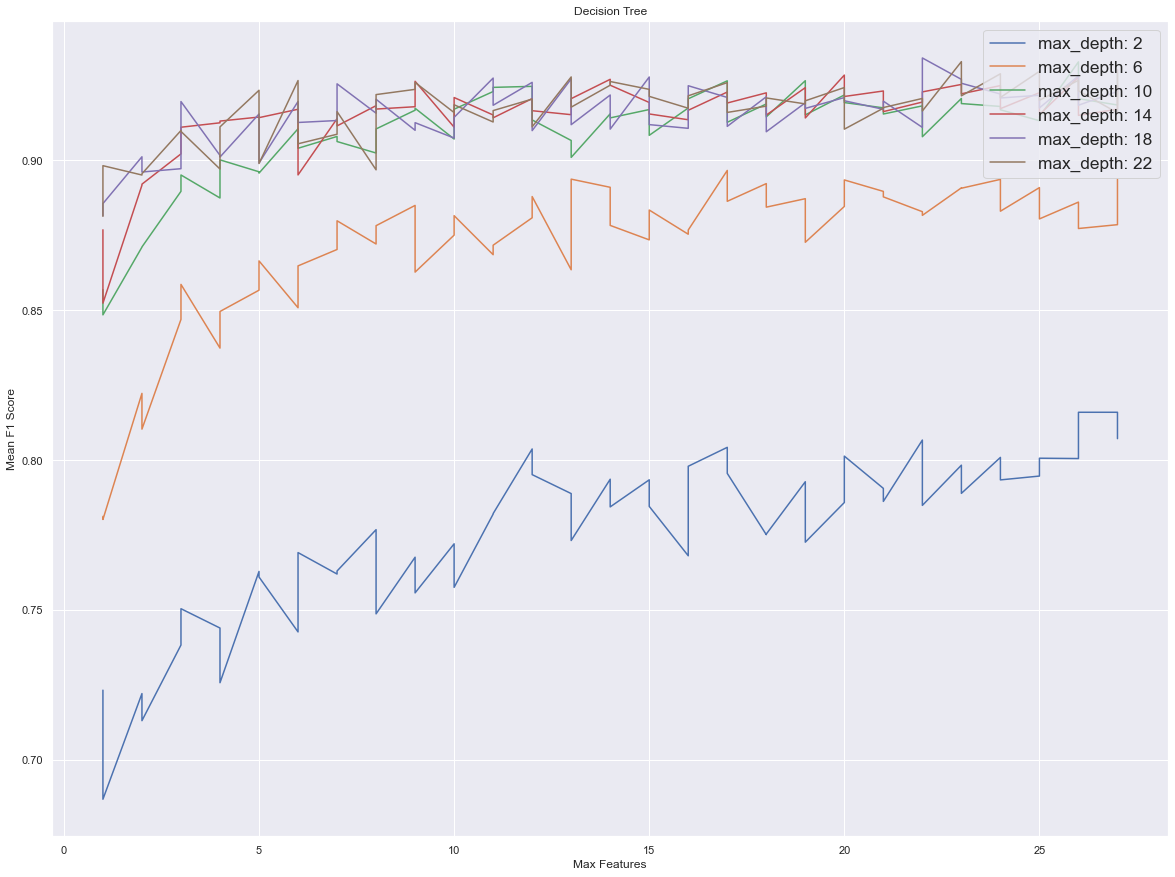

In [311]:
f, ax = plt.subplots(figsize = (20,15))

for depth in result['param_max_depth'].unique():
    df = result[result['param_max_depth'] == depth][['param_max_features','mean_test_score']]
    df = df.sort_values(by = ['param_max_features'])
    ax.plot(df['param_max_features'], df['mean_test_score'], label = 'max_depth: ' + str(depth))
    
ax.legend(loc = 1, fontsize = 'x-large')
ax.set_xlabel('Max Features', )
ax.set_ylabel('Mean F1 Score')
ax.set_title('Decision Tree')
ax.grid('on')

In [312]:
#To ensure that there is not too much overfitting (difference in test and train score)
ovf = result[['param_max_depth','mean_train_score','mean_test_score']]
ovf = pd.DataFrame(ovf)
ovf['overfit']= (result['mean_train_score'] - result['mean_test_score'])
a = ovf.groupby('param_max_depth').mean()
a.head()

,mean_train_score,mean_test_score,overfit
param_max_depth,,,
2,0.782819,0.775553,0.007266
6,0.909390,0.871876,0.037514
10,0.979907,0.909588,0.070319
14,0.997465,0.915055,0.082410
18,0.999791,0.915406,0.084385


From the overfit values, it appears that above a max_depth of 10 results in a too high overfit value.

In [370]:
# We carry out gridsearch again to find the optimal model
criterion = ['gini', 'entropy']
# Number of features to consider at every split
max_features = [int(x) for x in np.arange(start = 1, stop = 28, step = 1)]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.arange(start = 2, stop = 10,)]

param_grid = {
    'criterion': criterion,
    'max_features': max_features,
    'max_depth': max_depth,
}


newdectree = DecisionTreeClassifier()
grid_search = GridSearchCV(
    estimator = newdectree,
    param_grid = param_grid,
    cv = 10,
    n_jobs = -1,
    scoring = 'f1',
    return_train_score = True
)

g_search = grid_search.fit(X_train, y_train)

In [371]:
result = pd.DataFrame(g_search.cv_results_)
result.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,params,split0_test_score,split1_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.009336,0.003678,0.006169,0.001961,gini,2,1,"{'criterion': 'gini', 'max_depth': 2, 'max_fea...",0.700422,0.666667,...,0.760703,0.765882,0.761187,0.734738,0.666231,0.711409,0.665873,0.657087,0.725324,0.043978
1,0.007978,0.001450,0.004918,0.000882,gini,2,2,"{'criterion': 'gini', 'max_depth': 2, 'max_fea...",0.786408,0.638298,...,0.788514,0.818944,0.660598,0.685680,0.724730,0.752284,0.712750,0.663415,0.728893,0.048773
2,0.007442,0.000953,0.005477,0.002455,gini,2,3,"{'criterion': 'gini', 'max_depth': 2, 'max_fea...",0.762332,0.775510,...,0.758126,0.806418,0.758034,0.718043,0.792867,0.778542,0.788308,0.746579,0.771262,0.025107
3,0.008668,0.003678,0.005604,0.000856,gini,2,4,"{'criterion': 'gini', 'max_depth': 2, 'max_fea...",0.735632,0.635294,...,0.787879,0.796145,0.661417,0.724271,0.787551,0.813262,0.814639,0.810784,0.757196,0.058254
4,0.008270,0.001457,0.006462,0.005350,gini,2,5,"{'criterion': 'gini', 'max_depth': 2, 'max_fea...",0.830000,0.800000,...,0.610992,0.809402,0.752995,0.655473,0.786538,0.750138,0.807947,0.790965,0.749811,0.062939


In [374]:
#We check the overfit value again
ovf = result[['param_max_depth','mean_train_score','mean_test_score']]
ovf = pd.DataFrame(ovf)
ovf['overfit']= (result['mean_train_score'] - result['mean_test_score'])
a = ovf.groupby('param_max_depth').mean()
print(a)

                 mean_train_score  mean_test_score   overfit
param_max_depth                                             
2                        0.787087         0.780830  0.006257
3                        0.805905         0.789018  0.016887
4                        0.854344         0.835851  0.018493
5                        0.883353         0.859256  0.024098
6                        0.910199         0.872600  0.037599
7                        0.933278         0.885764  0.047514
8                        0.953690         0.898103  0.055587
9                        0.969530         0.904902  0.064627


To obtain less than 0.5 overfit value, we select `max_depth=7`

In [375]:
# We carry out gridsearch again to find the optimal model
criterion = ['gini', 'entropy']
# Number of features to consider at every split
max_features = [int(x) for x in np.arange(start = 1, stop = 28, step = 1)]
# Maximum number of levels in tree
max_depth = [7]

param_grid = {
    'criterion': criterion,
    'max_features': max_features,
    'max_depth': max_depth,
}


newdectree = DecisionTreeClassifier()
grid_search = GridSearchCV(
    estimator = newdectree,
    param_grid = param_grid,
    cv = 10,
    n_jobs = -1,
    scoring = 'f1',
    return_train_score = True
)

g_search = grid_search.fit(X_train, y_train)

In [377]:
result = pd.DataFrame(g_search.cv_results_)
result.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,params,split0_test_score,split1_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.008211,0.002578,0.004938,0.001205,gini,7,1,"{'criterion': 'gini', 'max_depth': 7, 'max_fea...",0.783920,0.743719,...,0.813341,0.821450,0.814029,0.871351,0.821411,0.856838,0.871926,0.832855,0.839325,0.021243
1,0.007634,0.000800,0.005236,0.001282,gini,7,2,"{'criterion': 'gini', 'max_depth': 7, 'max_fea...",0.776699,0.780488,...,0.854019,0.887562,0.897959,0.870840,0.897806,0.885593,0.879247,0.891628,0.885308,0.013606
2,0.008337,0.001118,0.005225,0.001372,gini,7,3,"{'criterion': 'gini', 'max_depth': 7, 'max_fea...",0.827225,0.752294,...,0.888320,0.906793,0.905295,0.904439,0.920484,0.902664,0.892405,0.905844,0.900848,0.011912
3,0.009056,0.001086,0.005552,0.001652,gini,7,4,"{'criterion': 'gini', 'max_depth': 7, 'max_fea...",0.851485,0.795918,...,0.899102,0.912794,0.909370,0.914557,0.930159,0.905263,0.922914,0.925906,0.915301,0.009191
4,0.008941,0.000677,0.005117,0.001479,gini,7,5,"{'criterion': 'gini', 'max_depth': 7, 'max_fea...",0.808290,0.800000,...,0.917838,0.918219,0.905441,0.960212,0.926316,0.919110,0.919280,0.899839,0.919967,0.015189


In [378]:
g_search.best_params_

{'criterion': 'gini', 'max_depth': 7, 'max_features': 18}

### Train Optimized Model


Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9431880860452289

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.7454954954954955



<AxesSubplot:>

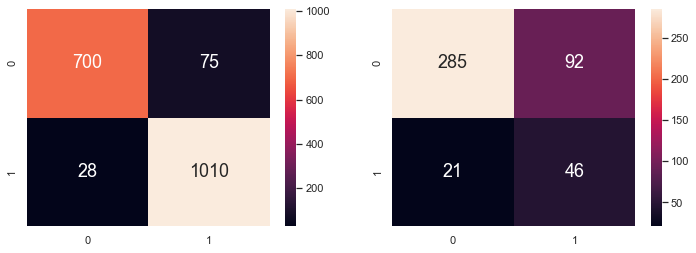

In [387]:
# Train our new model
opdectree = DecisionTreeClassifier(criterion='gini', max_depth=7, max_features=18)
opdectree.fit(X_train, y_train)


# Predict Response corresponding to Predictors
y_train_pred = opdectree.predict(X_train)
y_test_pred = opdectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", opdectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", opdectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

[Text(319.2557142857143, 611.5500000000001, 'ChildrenHome <= 0.5\ngini = 0.489\nsamples = 1813\nvalue = [775, 1038]\nclass = 1'),
 Text(195.3, 530.01, 'MntWines <= 648.0\ngini = 0.293\nsamples = 819\nvalue = [146, 673]\nclass = 1'),
 Text(141.89142857142858, 448.47, 'Marital_Status_Married <= 0.5\ngini = 0.447\nsamples = 403\nvalue = [136, 267]\nclass = 1'),
 Text(86.09142857142857, 366.93, 'Education_Graduation <= 0.5\ngini = 0.363\nsamples = 323\nvalue = [77, 246]\nclass = 1'),
 Text(47.82857142857143, 285.39000000000004, 'Education_2n Cycle <= 0.5\ngini = 0.218\nsamples = 225\nvalue = [28, 197]\nclass = 1'),
 Text(25.50857142857143, 203.85000000000002, 'Education_Master <= 0.5\ngini = 0.155\nsamples = 213\nvalue = [18, 195]\nclass = 1'),
 Text(12.754285714285714, 122.31000000000006, 'Year_Customer <= 7.015\ngini = 0.06\nsamples = 194\nvalue = [6, 188]\nclass = 1'),
 Text(6.377142857142857, 40.76999999999998, 'gini = 0.375\nsamples = 4\nvalue = [3, 1]\nclass = 0'),
 Text(19.131428571

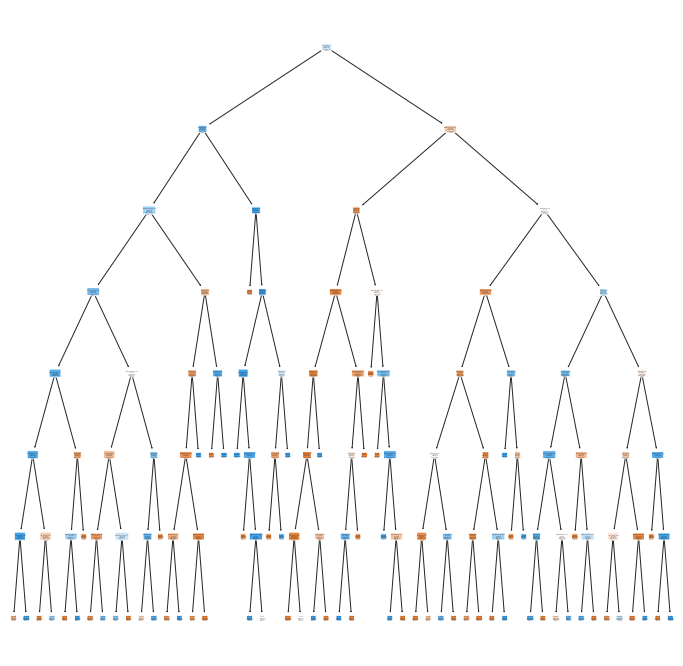

In [380]:
# Plot the trained Decision Tree
f = plt.figure(figsize=(12,12))
plot_tree(opdectree, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["0","1"])

### ROC Curve & Precision Recall Curve

In order to compare the performance of our models, we also compare their ROC AUC Score. Lets plot a ROC curve for the decision tree.

In [408]:
y_true = pd.DataFrame(y_test)
y_score = opdectree.predict_proba(X_test)
y_score = pd.DataFrame(y_score[:,1], columns=["1"])

ROC AUC:  0.7710914921414149
PRC AUC:  0.4
Best threshold based on ROC:  0.10526315789473684
Best threshold based on PRC:  0.6666666666666666


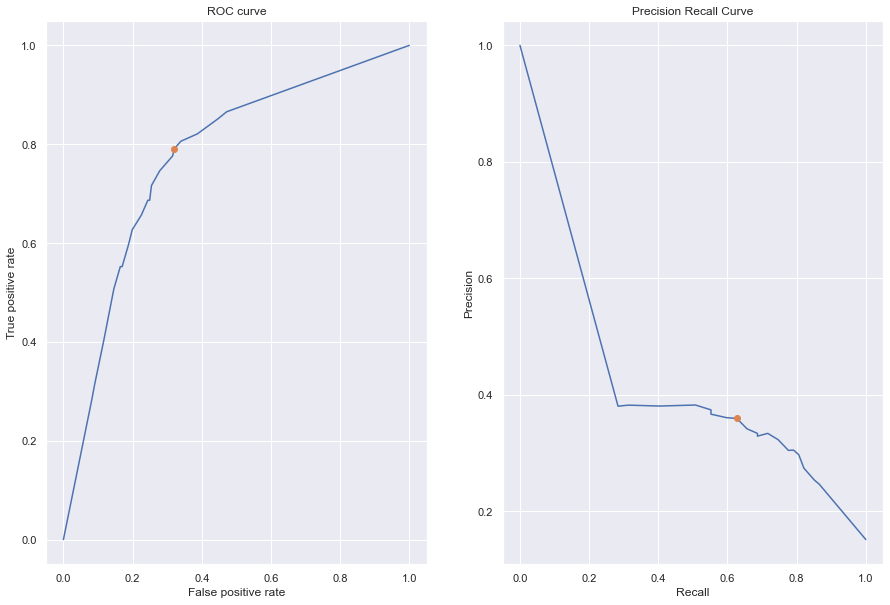

In [416]:
f, axes = plt.subplots(1, 2, figsize = (15, 10))

# ROC Curve via Youden's J statistic
fpr, tpr, roc_thresholds = roc_curve(y_true, y_score, pos_label = 1)
roc = np.column_stack((fpr, tpr, tpr-fpr, roc_thresholds))
roc = pd.DataFrame(roc, columns = ['FPR', 'TPR', 'TPR - FPR', 'Thresholds'])
roc = roc.sort_values(by='TPR - FPR', ascending=False)
auroc = metrics.auc(fpr, tpr)

axes[0].plot(fpr, tpr)
axes[0].set_xlabel('False positive rate')
axes[0].set_ylabel('True positive rate')
axes[0].set_title('ROC curve')
axes[0].plot(0.320955, 0.791045, 'o')    #Best Threshold

# PR Curve via F1 Score
# Note the last precision and recall does not have a corresponding threshold value so they should be left out
precision, recall, prc_thresholds = precision_recall_curve(y_true, y_score, pos_label = 1)
f1_score = (2* precision * recall) / (precision + recall)
prc = np.column_stack((precision[:-1], recall[:-1], f1_score[:-1], prc_thresholds))
prc = pd.DataFrame(prc, columns = ['Precision', 'Recall', 'F1 Score', 'Thresholds'])
prc = prc.sort_values(by='F1 Score', ascending=False)
auprc = metrics.auc(recall, precision)

axes[1].plot(recall, precision)
axes[1].set_xlabel('Recall')
axes[1].set_ylabel('Precision')
axes[1].set_title('Precision Recall Curve')
axes[1].plot(0.626866, 0.358974, 'o')    #Best Threshold

print("ROC AUC: ", auroc)
print("PRC AUC: ", format(auprc, ".1f"))
print("Best threshold based on ROC: ", roc["Thresholds"].iloc[0])
print("Best threshold based on PRC: ", prc["Thresholds"].iloc[0])

In [417]:
roc.head()

,FPR,TPR,TPR - FPR,Thresholds
15,0.320955,0.791045,0.470090,0.105263
13,0.278515,0.746269,0.467754,0.291667
16,0.339523,0.805970,0.466448,0.031250
12,0.254642,0.716418,0.461776,0.400000
14,0.315650,0.776119,0.460470,0.176471


In [418]:
prc.head()

,Precision,Recall,F1 Score,Thresholds
12,0.358974,0.626866,0.456522,0.666667
8,0.333333,0.716418,0.454976,0.400000
7,0.322581,0.746269,0.450450,0.291667
13,0.360360,0.597015,0.449438,0.837209
11,0.341085,0.656716,0.448980,0.583333


In [419]:
from sklearn.metrics import f1_score

# Initial performance
init_accuracy = accuracy_score(y_test, y_test_pred)
init_balanced = balanced_accuracy_score(y_test, y_test_pred)
init_Fscore = f1_score(y_test, y_test_pred)
init_recall = recall_score(y_test, y_test_pred)
init_precision = precision_score(y_test, y_test_pred)

# Change to optimal thresholds obtained from ROC and PRC
roc_pred = (y_score >= roc["Thresholds"].iloc[0]).astype('int')
prc_pred = (y_score >= prc["Thresholds"].iloc[0]).astype('int')

# Final performance
roc_accuracy = accuracy_score(y_test, roc_pred)
roc_balanced = balanced_accuracy_score(y_test, roc_pred)
roc_Fscore = f1_score(y_test, roc_pred)
roc_recall = recall_score(y_test, roc_pred)
roc_precision = precision_score(y_test, roc_pred)

prc_accuracy = accuracy_score(y_test, prc_pred)
prc_balanced = balanced_accuracy_score(y_test, prc_pred)
prc_Fscore = f1_score(y_test, prc_pred)
prc_recall = recall_score(y_test, prc_pred)
prc_precision = precision_score(y_test, prc_pred)

performance = {"Accuracy": [init_accuracy, roc_accuracy, prc_accuracy,],
               "Balanced Accuracy": [init_balanced, roc_balanced, prc_balanced],
               "F Score": [init_Fscore, roc_Fscore, prc_Fscore],
              "Recall": [init_recall, roc_recall, prc_recall],
              "Precision": [init_precision, roc_precision, prc_precision]}

final = pd.DataFrame(performance, index = ["Initial", "ROC", "PRC"])
final

,Accuracy,Balanced Accuracy,F Score,Recall,Precision
Initial,0.745495,0.721268,0.448780,0.686567,0.333333
ROC,0.695946,0.735045,0.439834,0.791045,0.304598
PRC,0.774775,0.713963,0.456522,0.626866,0.358974


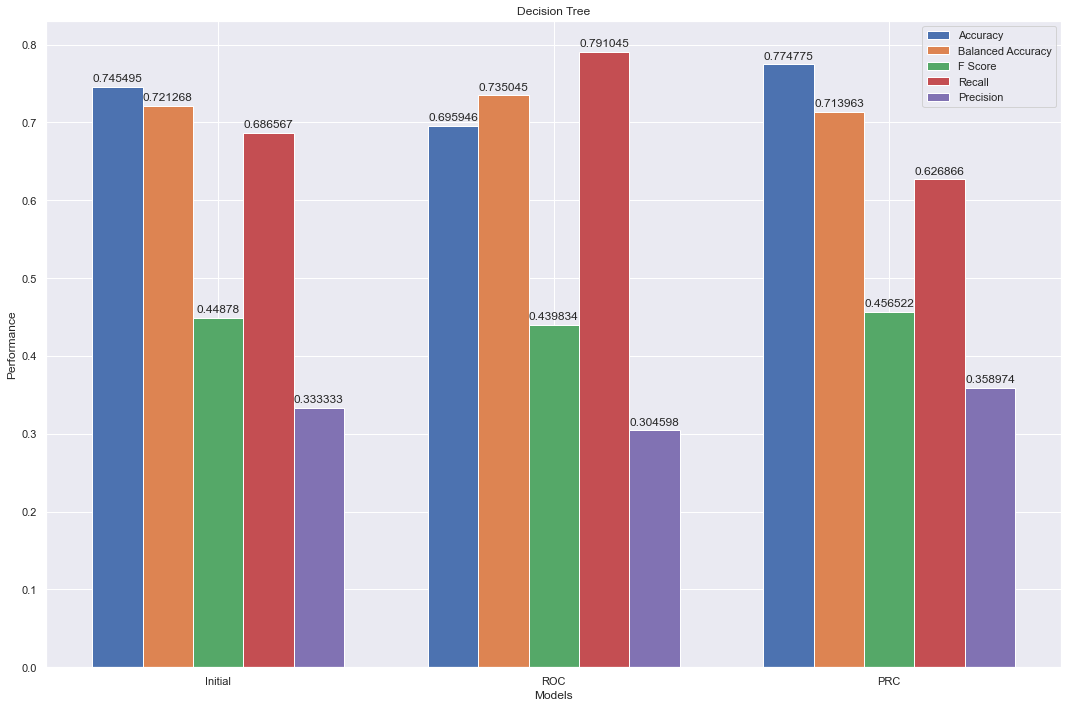

In [420]:
labels = list(final.index)
x = np.arange(len(labels))
width = 0.15

fig, ax = plt.subplots(figsize = (15, 10))
first_col = ax.bar(x - 2*width, final["Accuracy"], width, label = 'Accuracy')
sec_col = ax.bar(x - 1*width, final["Balanced Accuracy"], width, label = "Balanced Accuracy")
third_col = ax.bar(x, final["F Score"], width, label = "F Score")
fourth_col = ax.bar(x + 1*width, final["Recall"], width, label = "Recall")
fifth_col = ax.bar(x + 2*width, final["Precision"], width, label = "Precision")

ax.set_ylabel("Performance")
ax.set_xlabel("Models")
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_title("Decision Tree")
ax.legend(loc = 1)

ax.bar_label(first_col, padding=3)
ax.bar_label(sec_col, padding=3)
ax.bar_label(third_col, padding=3)
ax.bar_label(fourth_col, padding=3)
ax.bar_label(fifth_col, padding=3)

fig.tight_layout()

plt.show()

## Feature Importances

Using the decision tree built-in algorithmn to find out feature importance

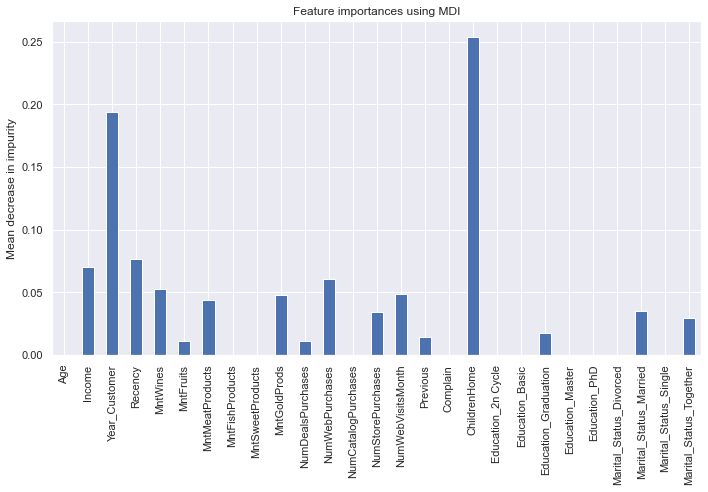

In [421]:
# Feature importance based on mean decrease in impurity (MDI)
importances = opdectree.feature_importances_

dectree_importances = pd.Series(importances, index=X_train.columns)

fig, ax = plt.subplots(figsize=(10, 7))
dectree_importances.plot.bar(ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [422]:
dectree_importances.nlargest(n=3, keep='all')

ChildrenHome     0.253922
Year_Customer    0.194090
Recency          0.076196
dtype: float64

According to the feature importances of our optimized decision tree model, we see that the top 3 important features to determine `Response` are:

1. Children Home
2. Year_Customer
3. Recency

We will compare our findings in later part of our project.